## Data input

In [625]:
# importing panda library
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
  
# readinag given csv file
# and creating dataframe
iris = pd.read_csv("iris.data", header = None)

# adding column headings
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
  
# storing this dataframe in a csv file
iris.to_csv('iris.csv', index = None)

# read from csv file
iris = pd.read_csv("iris.csv")


In [626]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

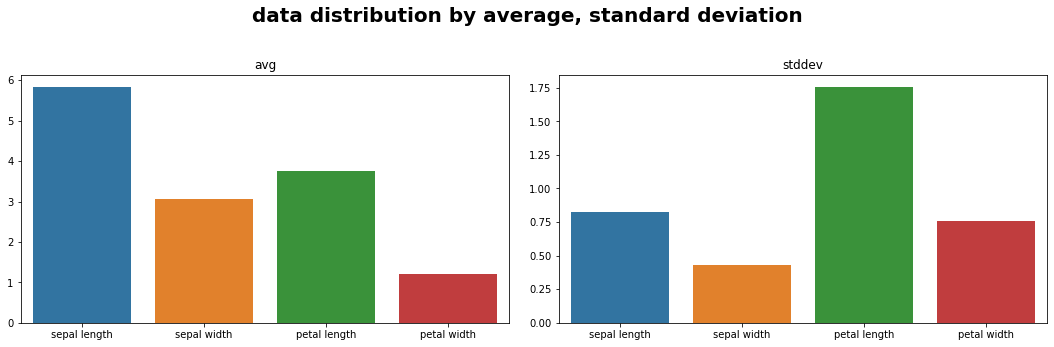

In [627]:
# import lib
import matplotlib.pyplot as plt
import seaborn as sns

iris_contifeatures = ['sepal length', 'sepal width', 'petal length', 'petal width']
contifeatures_avg = []
contifeatures_stddev = []

# calculate avg and stddev
for feature in iris_contifeatures:
    average = iris[feature].mean()
    stddev = np.std(iris[feature])
    contifeatures_avg.append(average)
    contifeatures_stddev.append(stddev)

# draw subplots
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('data distribution by average, standard deviation', fontweight="bold", size=20)

# Avg
sns.barplot(ax=axes[0], x = iris_contifeatures, y = contifeatures_avg)
axes[0].set_title('avg')

# Stddev
sns.barplot(ax=axes[1], x = iris_contifeatures, y = contifeatures_stddev)
axes[1].set_title('stddev')

fig.tight_layout(pad=2)

### - Data binning iris

In [628]:
iris['sepal length bin'] = pd.cut(iris['sepal length'], bins = [4,5,6,7,8])
iris['sepal width bin'] = pd.cut(iris['sepal width'], bins = [2,3,4,5])
iris['petal length bin'] = pd.cut(iris['petal length'], bins = [1,2,3,4,5,6,7])
iris['petal width bin'] = pd.cut(iris['petal width'], bins = [0,1,2,3])

iris.head()

,sepal length,sepal width,petal length,petal width,class,sepal length bin,sepal width bin,petal length bin,petal width bin
0,5.1,3.5,1.4,0.2,Iris-setosa,"(5, 6]","(3, 4]","(1, 2]","(0, 1]"
1,4.9,3.0,1.4,0.2,Iris-setosa,"(4, 5]","(2, 3]","(1, 2]","(0, 1]"
2,4.7,3.2,1.3,0.2,Iris-setosa,"(4, 5]","(3, 4]","(1, 2]","(0, 1]"
3,4.6,3.1,1.5,0.2,Iris-setosa,"(4, 5]","(3, 4]","(1, 2]","(0, 1]"
4,5.0,3.6,1.4,0.2,Iris-setosa,"(4, 5]","(3, 4]","(1, 2]","(0, 1]"


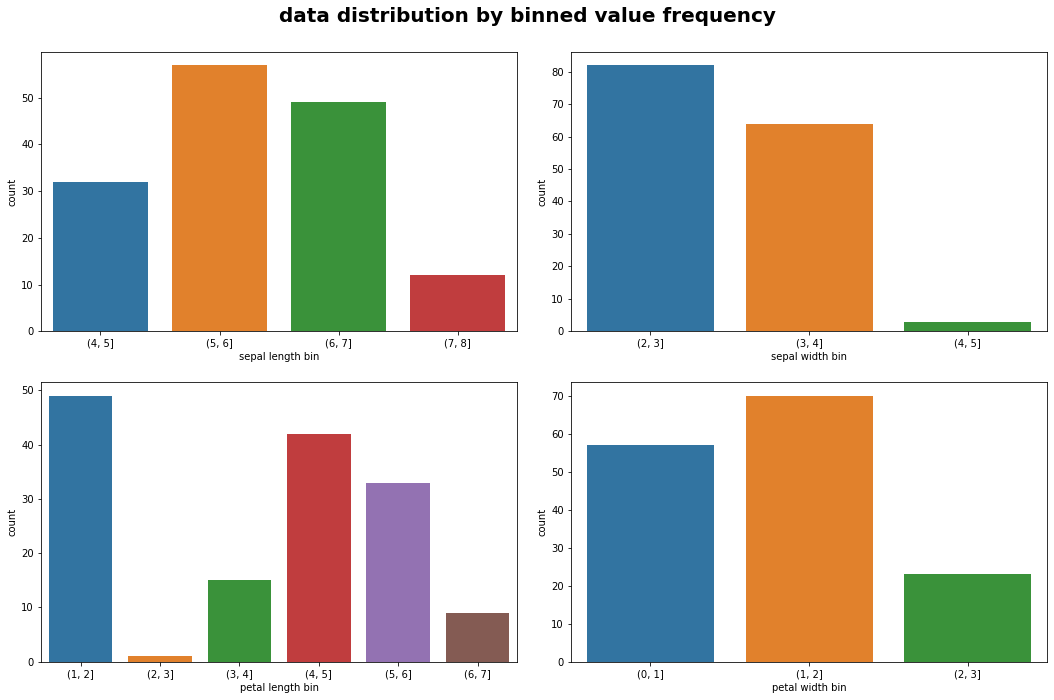

In [629]:
bins = ['sepal length bin', 'sepal width bin', 'petal length bin', 'petal width bin']

# draw subplots
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('data distribution by binned value frequency', fontweight="bold", size=20)

count = 0

for bin_ in bins:
    sns.countplot(ax=axes[int(count/2), count%2], x = iris[bin_])
    count+=1

fig.tight_layout(pad=2)

### - Split data based on their labels (targets) and show the data distribution

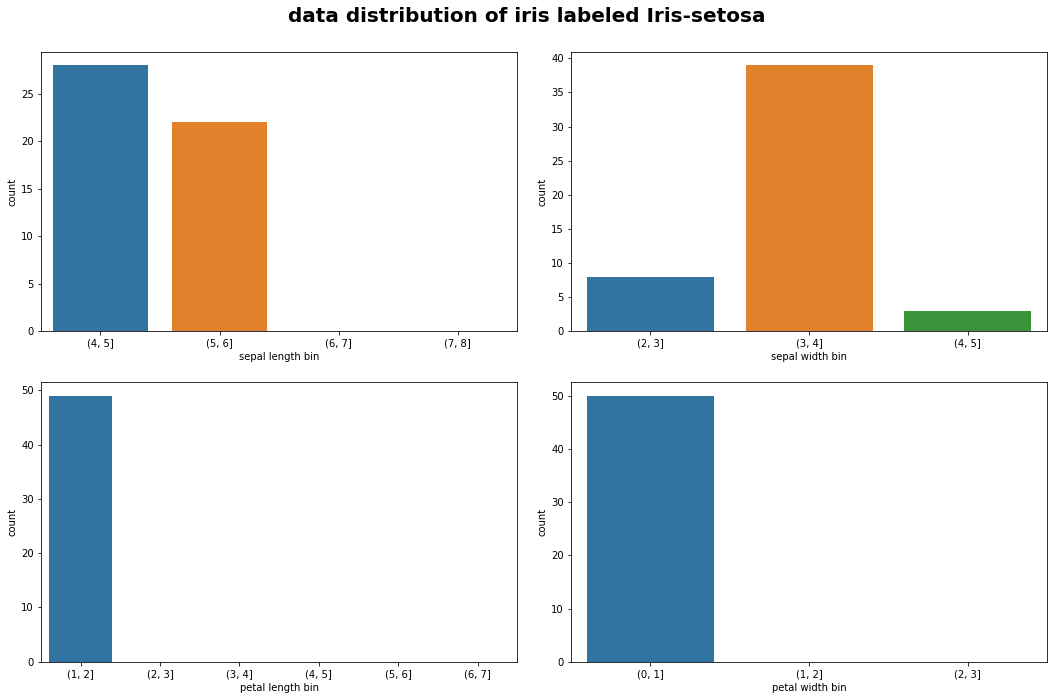

In [630]:
# iris_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_s = iris[iris["class"] == 'Iris-setosa']

# draw subplots
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('data distribution of iris labeled Iris-setosa', fontweight="bold", size=20)


#bins = ['sepal length bin', 'sepal width bin', 'petal length bin', 'petal width bin']
count = 0

for bin_ in bins:
    sns.countplot(ax=axes[int(count/2), count%2], x = label_s[bin_])
    count+=1
    
fig.tight_layout(pad=2)

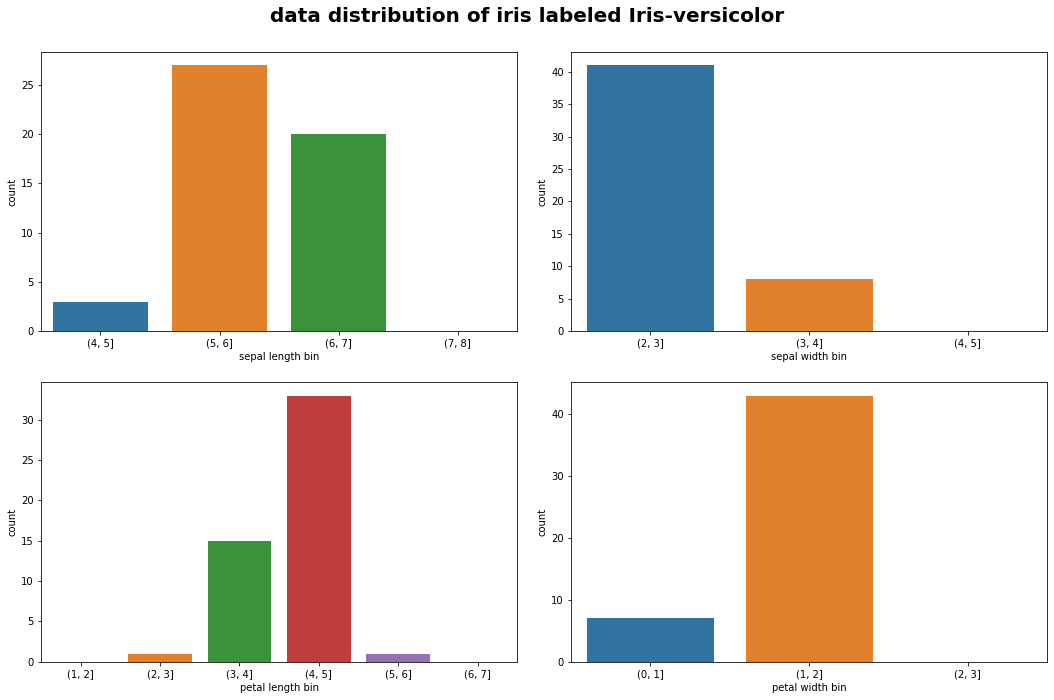

In [631]:
# iris_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_ve = iris[iris["class"] == 'Iris-versicolor']

# draw subplots
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('data distribution of iris labeled Iris-versicolor', fontweight="bold", size=20)


#bins = ['sepal length bin', 'sepal width bin', 'petal length bin', 'petal width bin']
count = 0

for bin_ in bins:
    sns.countplot(ax=axes[int(count/2), count%2], x = label_ve[bin_])
    count+=1
    
fig.tight_layout(pad=2)

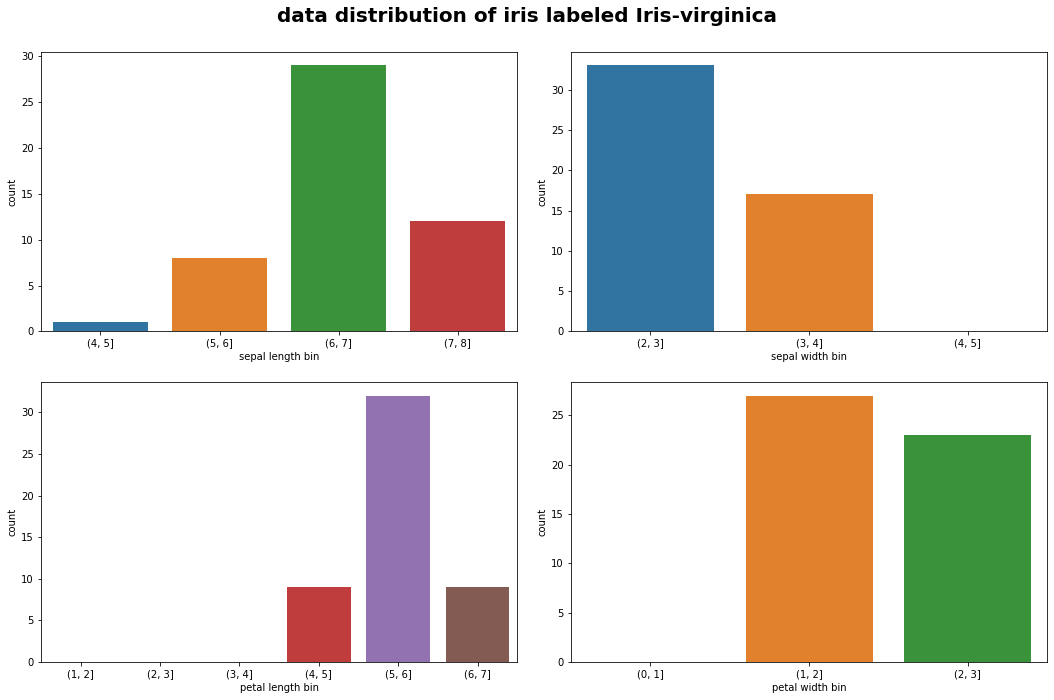

In [632]:
# iris_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_vi = iris[iris["class"] == 'Iris-virginica']

# draw subplots
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('data distribution of iris labeled Iris-virginica', fontweight="bold", size=20)

#bins = ['sepal length bin', 'sepal width bin', 'petal length bin', 'petal width bin']
count = 0

for bin_ in bins:
    sns.countplot(ax=axes[int(count/2), count%2], x = label_vi[bin_])
    count+=1
    
fig.tight_layout(pad=2)

## Data preprocessing

In [633]:
# Drop bins from previous data visualization
iris = iris.drop('sepal length bin', axis=1)
iris = iris.drop('sepal width bin', axis=1)
iris = iris.drop('petal length bin', axis=1)
iris = iris.drop('petal width bin', axis=1)

In [634]:
# Drop features with any missing value
iris = iris.replace('?', np.nan)
iris = iris.dropna(axis = 1)

# Transform discrete class to numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
iris['class'] = labelencoder.fit_transform(iris['class'])
#print(labelencoder.classes_) show the corresponding index of class

# Shuffle the data
iris = iris.sample(frac=1)

# Any other transformation boosts the final performance
################## Maybe do something here ########################


########################### END ##########################

iris.head()

,sepal length,sepal width,petal length,petal width,class
20,5.4,3.4,1.7,0.2,0
41,4.5,2.3,1.3,0.3,0
54,6.5,2.8,4.6,1.5,1
95,5.7,3.0,4.2,1.2,1
86,6.7,3.1,4.7,1.5,1


## Train-Test-Split & Model construction: holdout validation

In [635]:
from sklearn.model_selection import train_test_split

iris_data = iris.drop('class', axis = 1)
iris_class = iris['class']

X_train,X_test,y_train,y_test=train_test_split(iris_data,iris_class,test_size=0.3)

In [636]:
from sklearn.naive_bayes import GaussianNB

iris_model=GaussianNB()
iris_model.fit(X_train,y_train)

GaussianNB()

### - Results

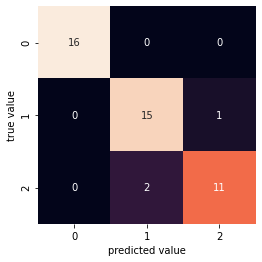

+------------+----------+-------------+
|   accuracy |   recall |   precision |
+============+==========+=============+
|   0.933333 | 0.927885 |    0.933007 |
+------------+----------+-------------+


In [637]:
# import lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import recall_score
from sklearn.metrics.classification import precision_score
from tabulate import tabulate

y_predict = iris_model.predict(X_test)

# results: confusion matrix
mat1 = confusion_matrix(y_test, y_predict)
sns.heatmap(mat1,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# results: accuracy
accuracy = accuracy_score(y_test, y_predict)

# results: sensitivity(recall)
recall = recall_score(y_test, y_predict, average='macro')

# results: precision
precision = precision_score(y_test, y_predict, average='macro')

# draw table with accuracy, recall, precision
data = [[accuracy, recall, precision]]

headers = ["accuracy", "recall", "precision"]

print(tabulate(data, headers= headers, tablefmt= "grid"))

## Train-Test-Split & Model construction: K-fold cross-validation

In [638]:
iris_model=GaussianNB()

In [639]:
import statistics
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=3)

accscores = []
recscores = []
prescores = []

cm_holder = []
    
for train_index, test_index in folds.split(iris_data,iris_class):
    X_train, X_test, y_train, y_test = iris_data.iloc[train_index], iris_data.iloc[test_index], \
                                       iris_class.iloc[train_index], iris_class.iloc[test_index]
    # test iris_model
    iris_model.fit(X_train, y_train)
    y_predict = iris_model.predict(X_test)
    cm_holder.append(confusion_matrix(y_test, y_predict))
    accscores.append(accuracy_score(y_test, y_predict))  
    recscores.append(recall_score(y_test, y_predict, average='macro'))  
    prescores.append(recall_score(y_test, y_predict, average='macro'))
    

### - Results

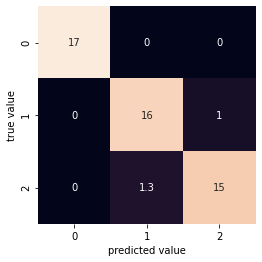

+------------+----------+-------------+
|   accuracy |   recall |   precision |
+============+==========+=============+
|   0.953333 | 0.953431 |    0.953431 |
+------------+----------+-------------+


In [640]:
# results: confusion matrix
mat2 = sum(cm_holder)/3
sns.heatmap(mat2,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# results: accuracy
accuracy2 = statistics.mean(accscores)

# results: sensitivity(recall)
recall2 = statistics.mean(recscores)

# results: precision
precision2 = statistics.mean(prescores)

# draw table with accuracy, recall, precision
data = [[accuracy2, recall2, precision2]]

headers = ["accuracy", "recall", "precision"]

print(tabulate(data, headers= headers, tablefmt= "grid"))

## Comparison & Conclusion

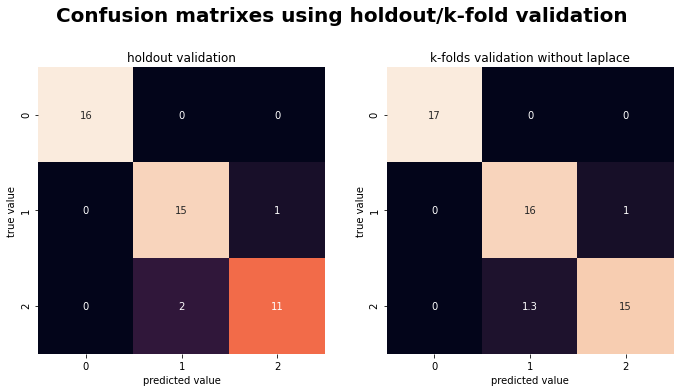

In [641]:
# Build subplot
fig, axes = plt.subplots(2, 2) # building a 2x2 plot to look better
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Confusion matrixes using holdout/k-fold validation', fontweight="bold", size=20)

sns.heatmap(mat1,square= True, annot=True, cbar= False, ax = axes[0][0])
axes[0][0].set_title('holdout validation')


sns.heatmap(mat2,square= True, annot=True, cbar= False, ax = axes[0][1])
axes[0][1].set_title('k-folds validation without laplace')

# name x and y axis
plt.setp(axes[:,:], xlabel='predicted value')
plt.setp(axes[:,:], ylabel='true value')

# delete extra plot
fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])

# print out the subplot
plt.tight_layout(pad=2)

從上圖我們可以得知：
- 在代表判斷正確的對角線中，k-folds validation表現皆優於holdout validation，而其餘判斷錯誤的情況中，k-folds也表現的比holdout好

　以綜合表現來看k-folds有較好的performance

In [642]:
# draw table with accuracy, recall, precision
data = [["holdout", accuracy, recall, precision],  
        ["k-folds", accuracy2, recall2, precision2]]

headers = ["", "accuracy", "recall", "precision"]

print(tabulate(data, headers= headers, tablefmt= "fancy_grid"))

╒═════════╤════════════╤══════════╤═════════════╕
│         │   accuracy │   recall │   precision │
╞═════════╪════════════╪══════════╪═════════════╡
│ holdout │   0.933333 │ 0.927885 │    0.933007 │
├─────────┼────────────┼──────────┼─────────────┤
│ k-folds │   0.953333 │ 0.953431 │    0.953431 │
╘═════════╧════════════╧══════════╧═════════════╛


從上圖我們可以得知各validation的performance：
- Accuracy: k-folds> holdout
- Recall: k-folds> holdout
- Precision: k-folds> holdout

從表格中可以看出，k-folds皆表現得比holdout好，但兩者三項的performance都有90%以上的準確率。

## Questions
- What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)?
- Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)

In [677]:
# iris_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
'''
# mushroom_model.classes_ # output: array([0, 1, 2])
# mushroom_model.n_features_ # output : 112

list(iris_data.columns)
output:
['sepal length', 'sepal width', 'petal length', 'petal width']
'''

# calculate mu & sigma
mu = iris_model.theta_[1][2]
sigma = iris_model.sigma_[1][2]
print("the value of 𝜇:", mu)
print("the value of 𝜎:", sigma)

the value of 𝜇: 4.272727272727273
the value of 𝜎: 0.18561983781656283


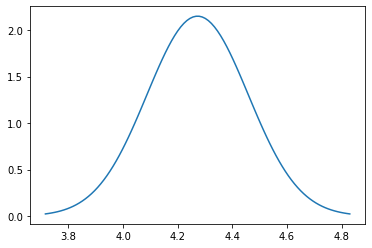

In [679]:
# draw the pdf of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)
import scipy.stats as stats
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()